In [92]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.decomposition import PCA

from matplotlib import style
style.use('ggplot')

В прошлых домашках датасет уже был обработан. Импортируем его сразу из csv, также импортируем изначальный датасет.

In [93]:
df_raw = pd.read_csv('bank.csv', sep = ';')
df = pd.read_csv('data_scaled.csv')

LOFом ранее были убраны выбросы, и здесь уберем их в обоих датасетах

In [94]:
data_types = df_raw.dtypes
int_cols = [df_raw.columns[i] for i in range(df_raw.shape[1]) if data_types[i] == 'int64']
float_cols = [df_raw.columns[i] for i in range(df_raw.shape[1]) if data_types[i] == 'float64']
cat_cols = [df_raw.columns[i] for i in range(df_raw.shape[1]) if data_types[i] == 'O']
y = cat_cols.pop(-1)
y = df_raw[y][mask]
y = y.replace({'yes':1, 'no': 0})

from sklearn.neighbors import LocalOutlierFactor

scaler = StandardScaler()
df_out = scaler.fit_transform(df_raw[[*int_cols, *float_cols]])

lof = LocalOutlierFactor(n_neighbors= 20)
outliers_data = lof.fit_predict(df_out)
mask = outliers_data != -1

df_raw = df_raw[mask]
df = df[mask]

Variance in 1 and 2 components = 0.245


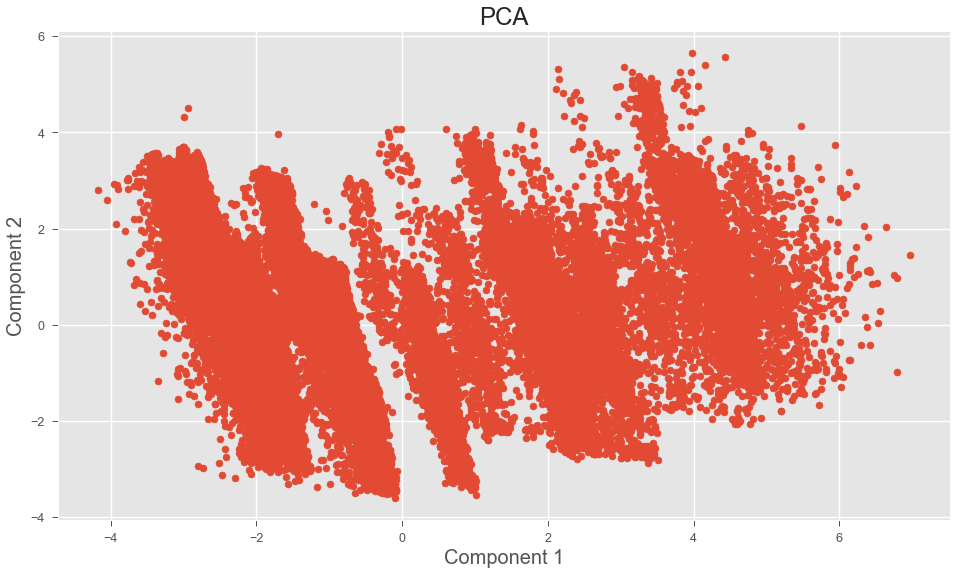

In [102]:
pca = PCA()
df_pca = pca.fit_transform(df)

print(f'Variance in 1 and 2 components = {pca.explained_variance_ratio_[:2].sum().round(3)}')

fig, ax = plt.subplots(figsize = (16, 9))
ax.scatter(df_pca[:, 0], df_pca[:, 1])
ax.set_title('PCA', fontsize = 24)
ax.set_xlabel('Component 1', fontsize = 20)
ax.set_ylabel('Component 2', fontsize = 20);

In [32]:
# t-SNE и UMAP
from sklearn.manifold import TSNE
from umap import UMAP

In [61]:
umap_n = [5, 10, 50]
perplexity = [5, 10, 25, 50, 100]

In [62]:
tsne_res = {}
for per in perplexity:
    X_tsne = TSNE(perplexity=per, random_state = 54).fit_transform(df)
    tsne_res['p = ' + str(per)] = X_tsne

C:\Users\Eugene\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Eugene\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Eugene\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Eugene\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Eugene\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Eugene\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: 

In [65]:
umap_res = {}
for n in umap_n:
    X_umap = UMAP(n_neighbors=n, random_state = 54).fit_transform(df)
    umap_res['n = ' + str(n)] = X_umap

C:\Users\Eugene\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Функция low_dim_plot визуализирует многомерные данные, в том числе из списка массивов. Используем его для визуализации работы методов для разных значений perplexity для T-SNE и n_neighbours для UMAP. Визуально отберем 2 лучших результата.

In [59]:
def low_dim_plot(X, multi = False, clust = False, method = '', title_add = '', hue = None, par_list = None):
    if not multi :
        if clust :
            fig, ax = plt.subplots(figsize = (12,6))
            ax.set_title(title_add)
            ax.set_ylabel('Y2')
            ax.set_xlabel('Y1')
            plot = ax.scatter(X[:, 0], X[:, 1], c=hue, cmap = 'tab20b', alpha=0.5)
            ax.legend(*plot.legend_elements(), title='clusters')
        else:
            fig, ax = plt.subplots(figsize = (12,6))
            ax.set_title(method + par_list + 'dimensionality reduction' + title_add)
            ax.set_ylabel('Y2')
            ax.set_xlabel('Y1')
            ax.scatter(X[:, 0], X[:, 1], alpha=0.5)

    else:
        with plt.style.context('seaborn-darkgrid'):
            fig, axs = plt.subplots(int(math.ceil(len(X)/2)), 2, figsize = (16, 5 * int(math.ceil(len(X)/2))))
            axs = np.array(axs)
            if type(title_add) == str:
                title_add = [title_add for i in range(len(X))]
            for ax, X_l, par, title_add in zip(axs.reshape(-1), X, par_list, title_add):
                ax.set_title(method + str(par) + ' dimensionality reduction ' + title_add, fontsize = 14)
                ax.set_ylabel('Y2')
                ax.set_xlabel('Y1')
                ax.scatter(X_l[:, 0], X_l[:, 1], c=hue, alpha=0.5)

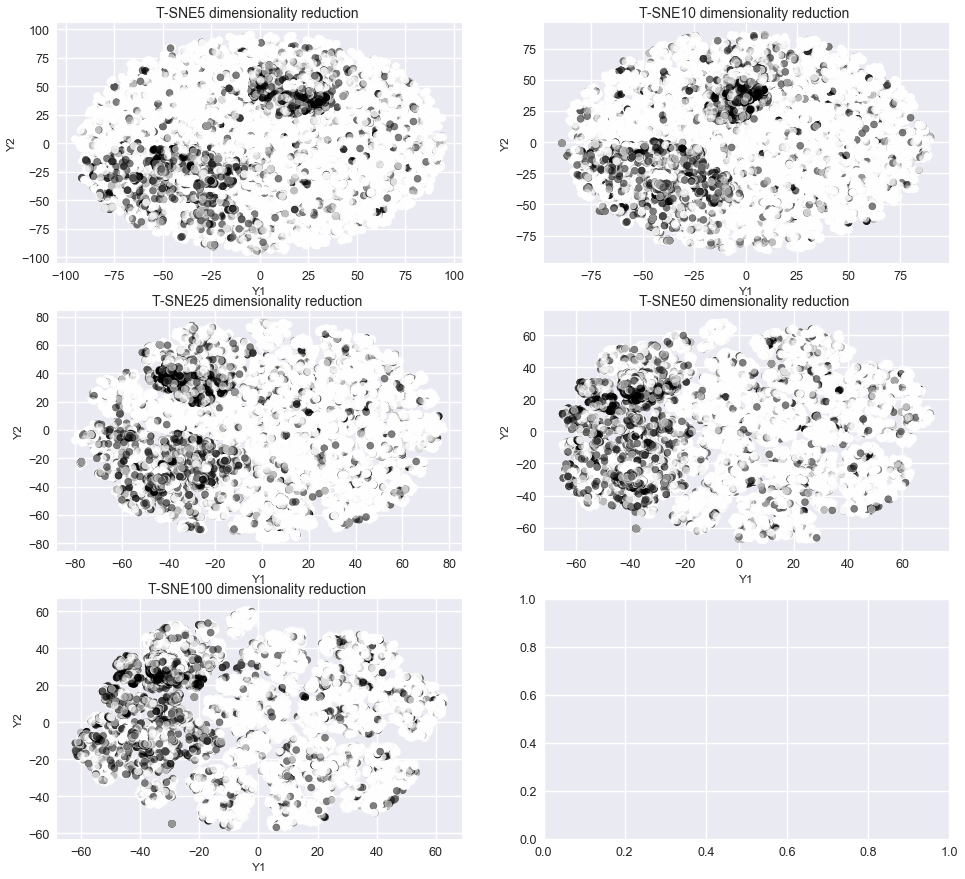

In [103]:
import math
low_dim_plot(tsne_res.values(), multi = True, method = 'T-SNE', par_list = perplexity, hue = y)

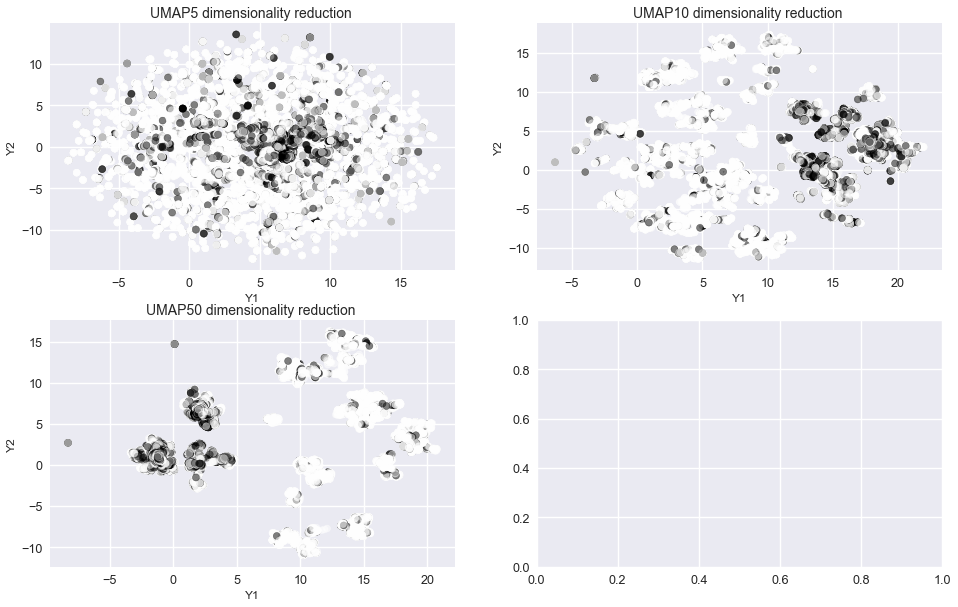

In [104]:
low_dim_plot(umap_res.values(), multi = True, method = 'UMAP', par_list = umap_n, hue = y)